In [91]:
from NSGPy.NumPy import LLS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from GPy.models import GPRegression
from GPy.kern import RBF

### GP-extra example

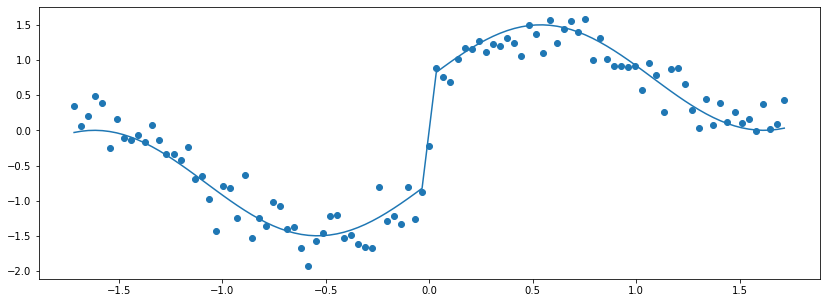

In [92]:
Xscaler = StandardScaler()
Yscaler = StandardScaler()
np.random.seed(0)
X = np.linspace(-1,1,101).reshape(-1,1)
y_real = np.sin(5*X) + np.sign(X)
y = np.sin(5*X) + np.sign(X) + np.random.normal(0,0.3,101).reshape(-1,1)
X = Xscaler.fit_transform(X)
y_real = Yscaler.fit_transform(y_real)
y = Yscaler.fit_transform(y)
plt.figure(figsize=(14,5))
plt.scatter(X, y);
plt.plot(X,y_real);

(<GPy.models.gp_regression.GPRegression at 0x7f3d6700cd10>,
 {'likelihood (mll)': -50.50269430021376,
  'GP_variance (sigma_f)': array([1.35044855]),
  'GP_noise_level (sigma_n)': array([0.09318084]),
  'L_GP_variance (sigma_f_bar)': array([0.00160323]),
  'L_GP_lengthscale (sigma_l_bar)': array([0.22233733]),
  'L_GP_noise_level (sigma_n_bar)': array([1.e-05]),
  'N_lengthscales (l_bar)': array([[1.e-05]])})

<Figure size 1008x720 with 0 Axes>

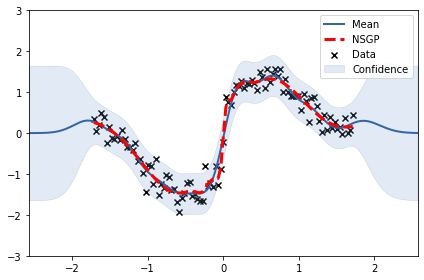

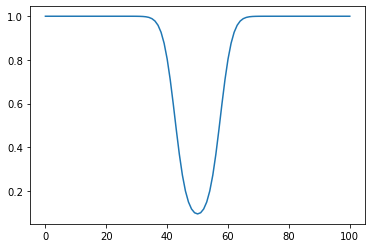

In [93]:
plt.figure(figsize=(14,10))
model = GPRegression(X, y, RBF(input_dim=1))
model.optimize()
model.plot()
LLSmodel = LLS(input_dim=1, N_l_bar=1, bounds=(10**-5,10**5))
LLSmodel.fit(X, y, n_restarts=5)
pred_y = LLSmodel.predict(X, False, False)
plt.plot(X.squeeze(), pred_y.squeeze(), '--', color='r', label='NSGP',linewidth=3)
LLSmodel.get_params()
# model.predict_lengthscales_(X)
plt.ylim(-3,3);
plt.legend()
plt.figure()
plt.plot(LLSmodel.predict_lengthscales_(X))
model,\
LLSmodel.get_params()

GP RMSE 0.2334047512938808
NSGP RMSE 0.2074342263571779


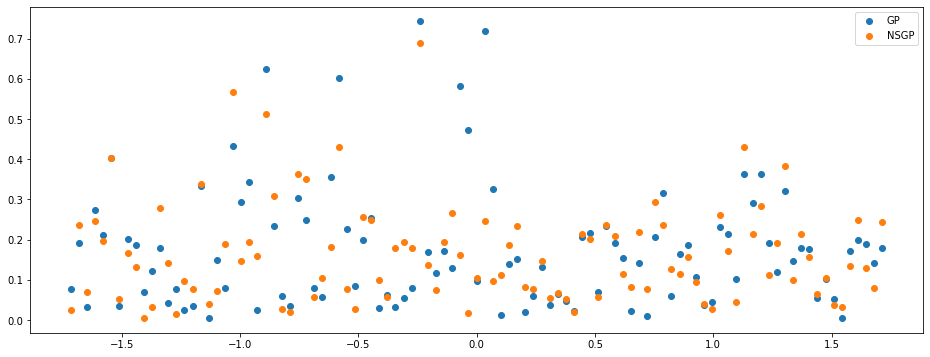

In [94]:
plt.figure(figsize=(16,6))
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=0)
model = GPRegression(X_trn, y_trn, RBF(input_dim=1))
model.optimize()
pred_y = model.predict(X)[0]
print('GP RMSE', mean_squared_error(y, pred_y, squared=False))
plt.scatter(X, np.abs(y-pred_y), label='GP')
LLSmodel = LLS(input_dim=1, N_l_bar=3, bounds=(10**-5,10**5))
LLSmodel.fit(X_trn, y_trn, n_restarts=5)
pred_y = LLSmodel.predict(X, False, False)
print('NSGP RMSE', mean_squared_error(y, pred_y, squared=False))
plt.scatter(X, np.abs(y-pred_y), label='NSGP');
plt.legend();

In [84]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=0)
model = GPRegression(X_trn, y_trn, RBF(input_dim=1))
model.optimize()
pred_y = model.predict(X_tst)[0]
print('GP RMSE', mean_squared_error(y_tst, pred_y, squared=False))
LLSmodel = LLS(input_dim=1, N_l_bar=5, bounds=(10**-5,10**5))
LLSmodel.fit(X_trn, y_trn, n_restarts=5)
pred_y = LLSmodel.predict(X_tst, False, False)
print('NSGP RMSE', mean_squared_error(y_tst, pred_y, squared=False))

GP RMSE 0.2985434228797978
NSGP RMSE 0.29313917632846304


### Peciorek - Function 2

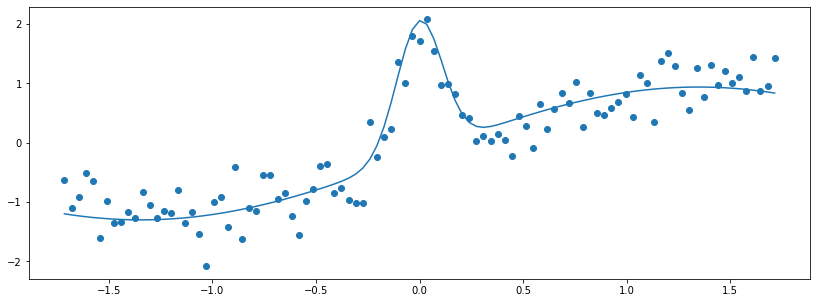

In [85]:
Xscaler = StandardScaler()
Yscaler = StandardScaler()
np.random.seed(0)
X = np.linspace(-2,2,101).reshape(-1,1)
y_real = np.sin(X) + 2*np.exp(-30*X**2)
y = np.sin(X) + 2*np.exp(-30*X**2) + np.random.normal(0,0.3,101).reshape(-1,1)
X = Xscaler.fit_transform(X)
y_real = Yscaler.fit_transform(y_real)
y = Yscaler.fit_transform(y)
plt.figure(figsize=(14,5))
plt.scatter(X, y);
plt.plot(X,y_real);

(<GPy.models.gp_regression.GPRegression at 0x7f3d67088d10>,
 {'likelihood (mll)': -17.458156265256033,
  'GP_variance (sigma_f)': array([1.23847]),
  'GP_noise_level (sigma_n)': array([0.20387379]),
  'L_GP_variance (sigma_f_bar)': array([0.00123868]),
  'L_GP_lengthscale (sigma_l_bar)': array([0.40650676]),
  'L_GP_noise_level (sigma_n_bar)': array([1.e-05]),
  'N_lengthscales (l_bar)': array([[1.e-05]])})

<Figure size 1008x720 with 0 Axes>

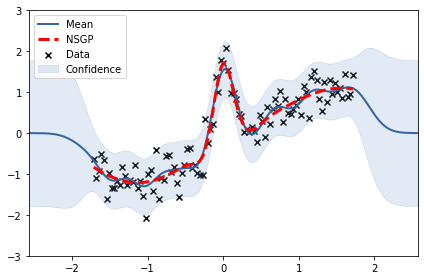

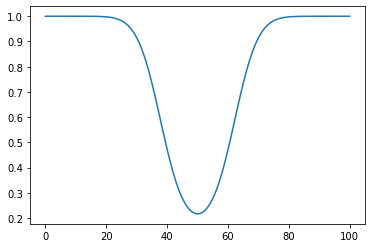

In [89]:
plt.figure(figsize=(14,10))
model = GPRegression(X, y, RBF(input_dim=1))
model.optimize()
model.plot()
LLSmodel = LLS(input_dim=1, N_l_bar=1, bounds=(10**-5,10**5))
LLSmodel.fit(X, y, n_restarts=5)
pred_y = LLSmodel.predict(X, False, False)
plt.plot(X.squeeze(), pred_y.squeeze(), '--', color='r', label='NSGP',linewidth=3)
LLSmodel.get_params()
# model.predict_lengthscales_(X)
plt.ylim(-3,3);
plt.legend()
plt.figure()
plt.plot(LLSmodel.predict_lengthscales_(X))
model,\
LLSmodel.get_params()

GP RMSE 0.30609519669411756
NSGP RMSE 0.30561888691226563


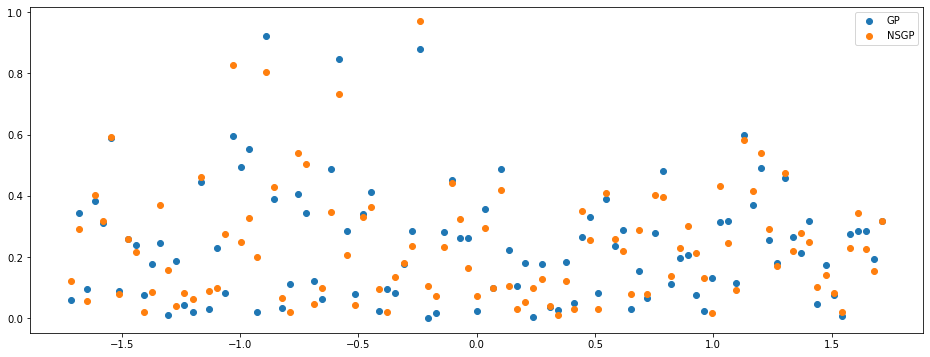

In [87]:
plt.figure(figsize=(16,6))
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=0)
model = GPRegression(X_trn, y_trn, RBF(input_dim=1))
model.optimize()
pred_y = model.predict(X)[0]
print('GP RMSE', mean_squared_error(y, pred_y, squared=False))
plt.scatter(X, np.abs(y-pred_y), label='GP')
LLSmodel = LLS(input_dim=1, N_l_bar=3, bounds=(10**-5,10**5))
LLSmodel.fit(X_trn, y_trn, n_restarts=5)
pred_y = LLSmodel.predict(X, False, False)
print('NSGP RMSE', mean_squared_error(y, pred_y, squared=False))
plt.scatter(X, np.abs(y-pred_y), label='NSGP');
plt.legend();